In [1]:
import glob 
from tqdm.auto import tqdm
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

tqdm.pandas()
plt.style.use("ggplot")

s2_path = "/projects/b1170/corpora/semantic_scholar"
acl_papers_path = f"{s2_path}/papers/acl"
acl_authors_path = f"{acl_papers_path}/authors"
over_three_path = f"{acl_authors_path}/over_three"
under_three_path = f"{acl_authors_path}/under_three"
acl_s2_path = f"{acl_papers_path}/s2"
acl_openalex_path = f"{acl_papers_path}/open_alex"

kind = "bar"
figsize = (30, 25)

# Graphs Of Authors By ACL Pub Count

In [ ]:
# Generate author count csv
author_files = glob.glob(f"{over_three_path}/*/*.json")
author_files.extend(glob.glob(f"{under_three_path}/*/*.json"))

cols = ["authorId", "aclCount"]
data = []
for af in tqdm(author_files):
    with open(af) as f:
        j = json.load(f)
        d = [j["authorId"], j["aclCount"]]
        data.append(d)

df = pd.DataFrame(data=data, columns=cols)
df.to_csv(f"{acl_authors_path}/acl_count.csv")

df

In [ ]:
count_df = pd.read_csv(f"{acl_authors_path}/acl_count.csv", index_col=0)
count_df["authorId"] = count_df["authorId"].str[1:].astype(int)
count_df = count_df.sort_values("authorId")
print(count_df, "\n")

count_freq_df = pd.DataFrame(count_df["aclCount"].value_counts())
count_freq_df = count_freq_df.reset_index()
count_freq_df = count_freq_df.astype(int)
count_freq_df = count_freq_df.sort_values("aclCount")
print(count_freq_df)

In [ ]:
x = "aclCount"
y = "count"
colors = ["red" if i < 3 else "green" for i in count_freq_df["aclCount"]]

plot = count_freq_df.plot(x=x, xlabel="ACL Paper Count", y=y, ylabel="Number of Authors", 
                          kind=kind, figsize=figsize, color=colors).get_figure()
plot.savefig(f"graphing/acl_count.png")

log_plot = count_freq_df.plot(x=x, xlabel="ACL Paper Count", y=y, ylabel="Number of Authors", 
                              kind=kind, figsize=figsize, color=colors, logy=True).get_figure()
log_plot.savefig(f"graphing/acl_count_logy.png")

In [13]:
geq3 = count_freq_df[count_freq_df["aclCount"] >= 3]
sum(geq3["count"]) / sum(count_freq_df["count"])

0.25711293941660435

# Graph(s) Of Missing Papers By Year

In [ ]:
# Generate paper year csv
paper_files = glob.glob(f"{acl_s2_path}/failed_papers/*.json")

cols = ["corpusId", "year"]
data = []

for pf in tqdm(paper_files):
    with open(pf) as f:
        j = json.load(f)
        if "year" in j and j["year"]:
            d = [j["corpusId"], j["year"]]  # OpenAlex work id, 
            data.append(d)

df = pd.DataFrame(data=data, columns=cols)
df.to_csv(f"{acl_openalex_path}/paper_years.csv")

df

In [7]:
years_df = pd.read_csv(f"{acl_openalex_path}/paper_years.csv", index_col=0)
# print(years_df)

year_freq_df = pd.DataFrame(years_df["year"].value_counts())
year_freq_df = year_freq_df.reset_index()
year_freq_df = year_freq_df.astype(int)
year_freq_df = year_freq_df.sort_values("year")
year_freq_df = year_freq_df.reset_index().drop(columns="index")
# print(year_freq_df)

    year  count
0   1952     11
1   1956      2
2   1957     11
3   1960     51
4   1961     13
5   1969      9
6   1971     13
7   1974      5
8   1975     16
9   1976     34
10  1977     12
11  1978     26
12  1979      7
13  1980      7
14  1981     20
15  1982     34
16  1983     20
17  1984     30
18  1985     27
19  1986     28
20  1987     31
21  1988     20
22  1989     29
23  1990     20
24  1991     13
25  1992     40
26  1993     26
27  1994     21
28  1995     32
29  1996     17
30  1997     36
31  1998     24
32  1999     31
33  2000     37
34  2001     14
35  2002     29
36  2003     26
37  2004     27
38  2005     34
39  2006     32
40  2007    131
41  2008     26
42  2009     29
43  2010     32
44  2011     58
45  2012     52
46  2013     14
47  2014     34
48  2015     22
49  2016     64
50  2017     40
51  2018     47
52  2019     86
53  2020    135
54  2021    476
55  2022   2741
56  2023    796


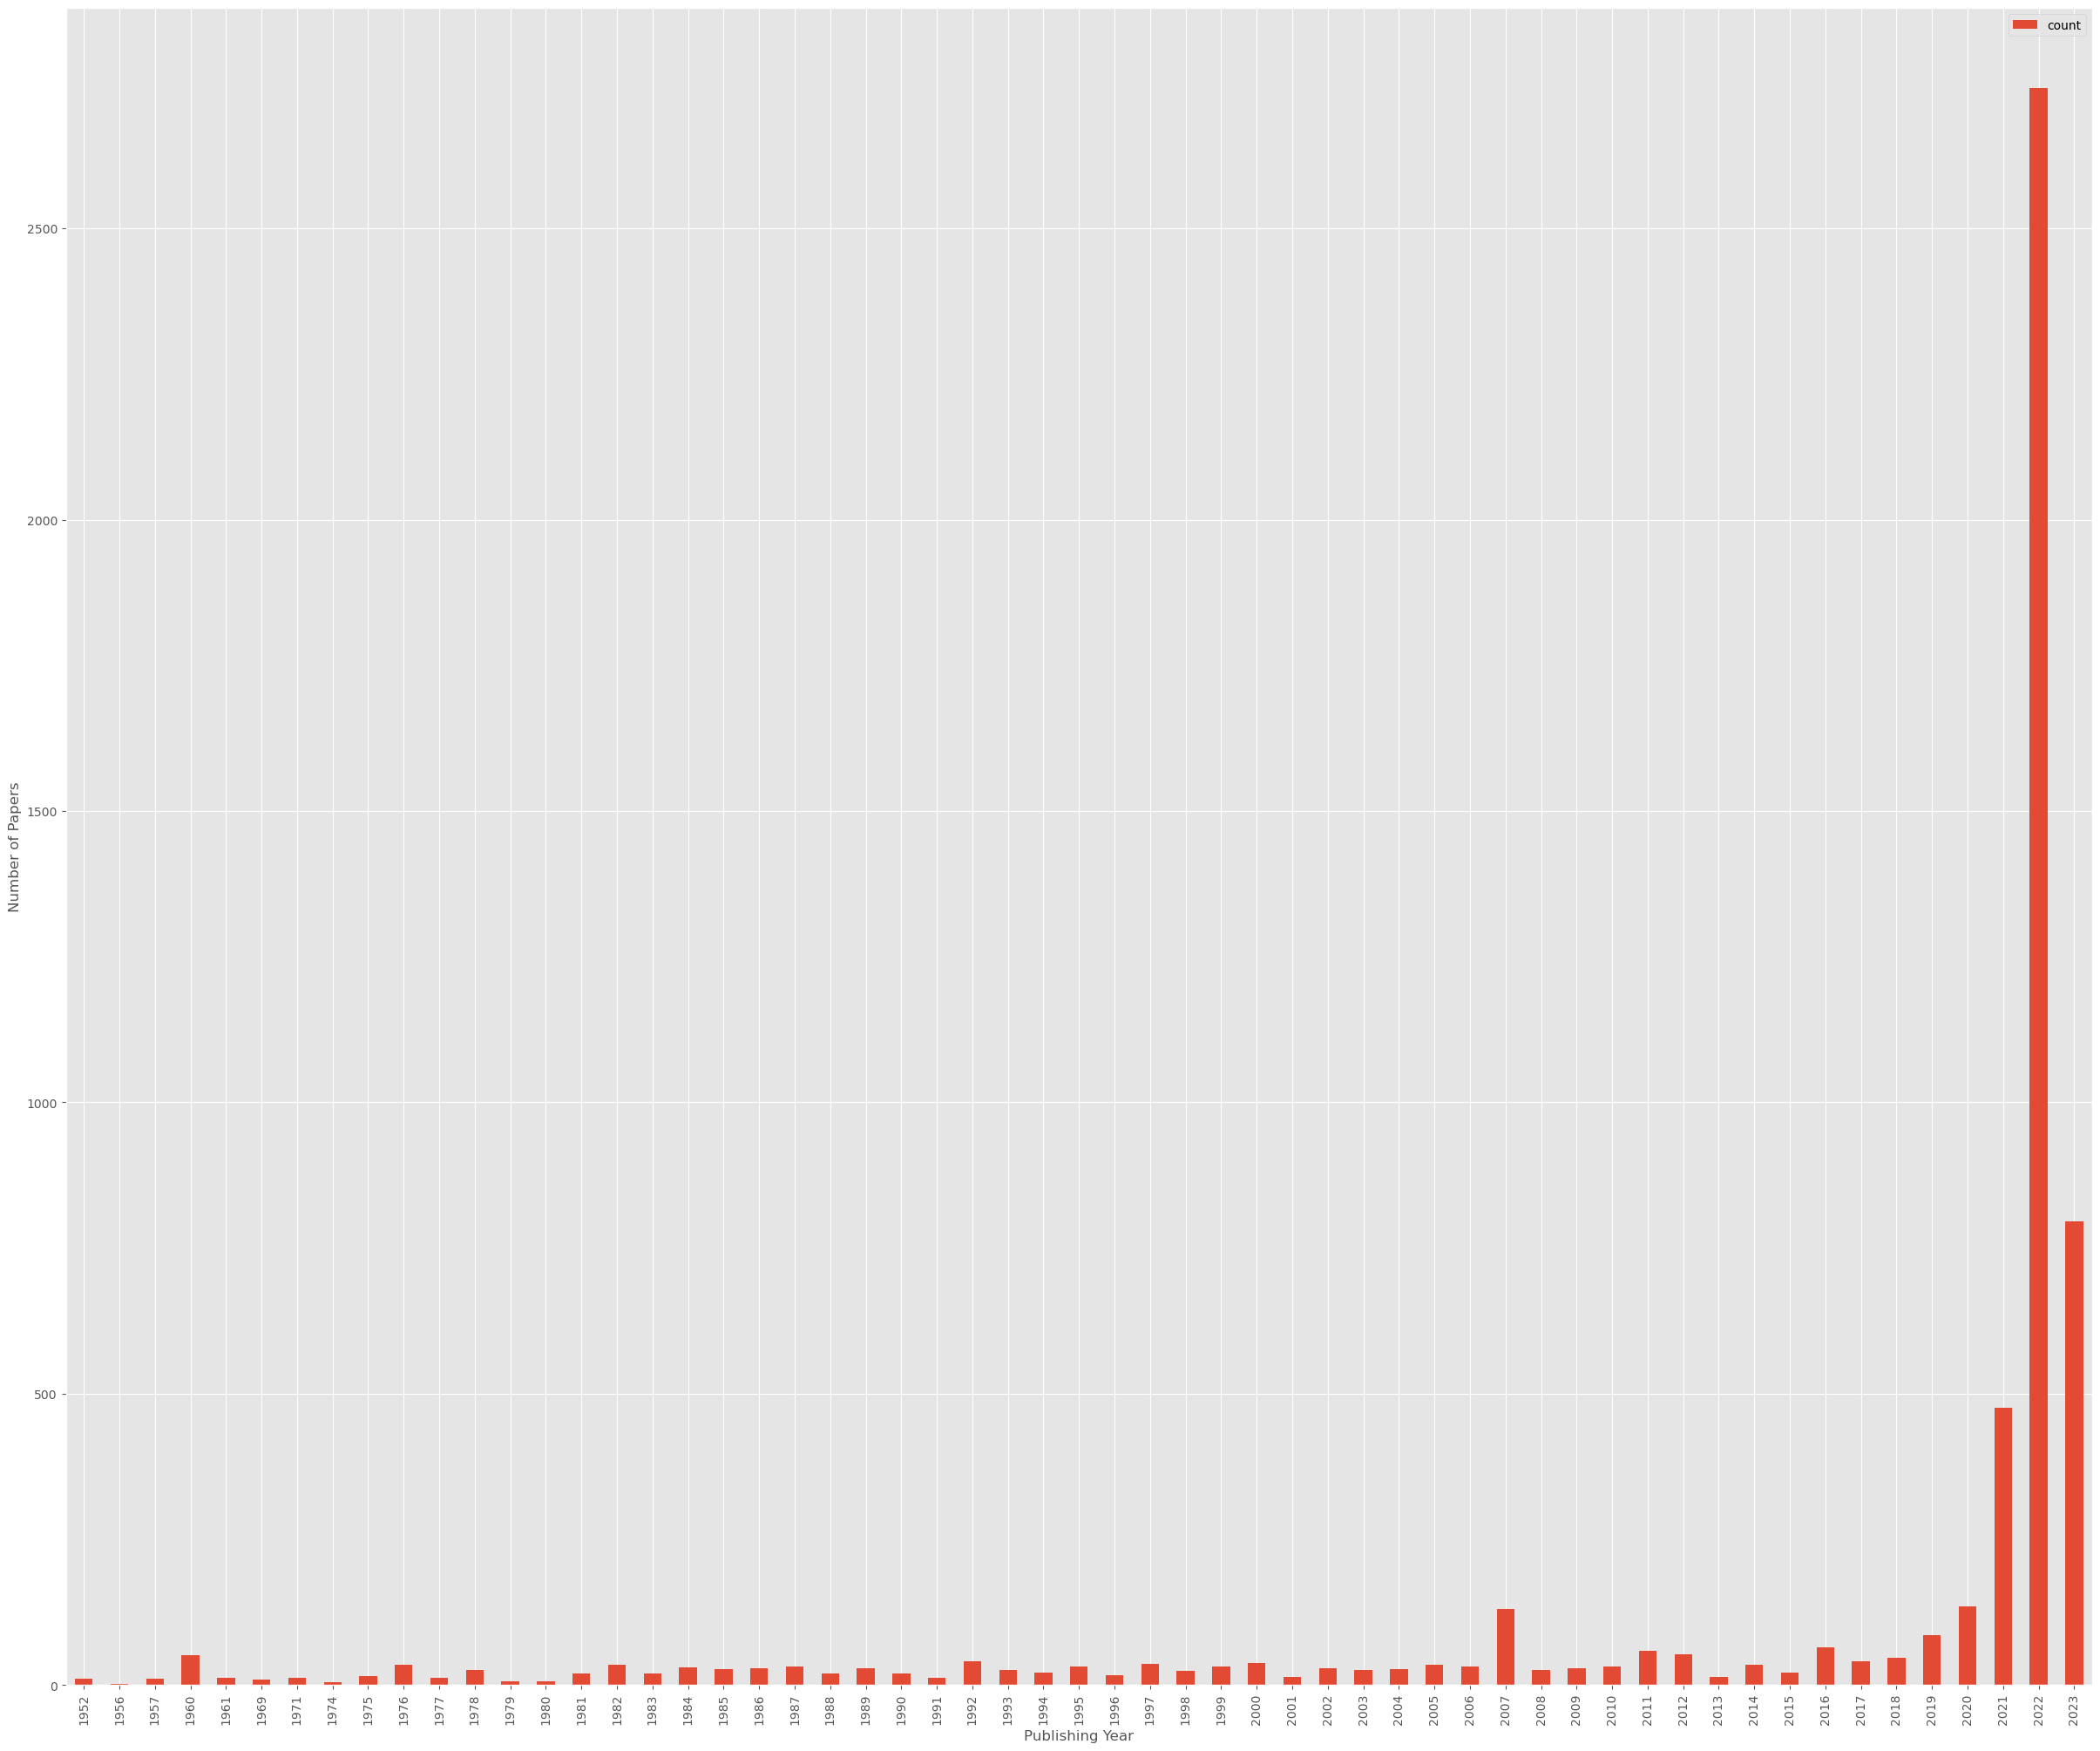

In [8]:
x = "year"
y = "count"
# colors = ["red" if i < 3 else "green" for i in count_freq_df["aclCount"]]

plot = year_freq_df.plot(x=x, xlabel="Publishing Year", y=y, ylabel="Number of Papers", 
                         kind=kind, figsize=figsize).get_figure()
plot.savefig(f"graphing/year_count.png")